In [1]:
import pymc
import numpy as np
import sklearn.datasets
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data

### 1.1 Boston Housing Prices

In [2]:
boston_prices = sklearn.datasets.load_boston()

In [35]:
X = boston_prices['data']
features = boston_prices['feature_names']
y_price = boston_prices['target']

In [4]:
boston_prices.viewkeys()

dict_keys(['data', 'feature_names', 'DESCR', 'target'])

In [5]:
print X.shape
print y.shape

(506, 13)
(506,)


In [6]:
boston_prices['DESCR']

"Boston House Prices dataset\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n        - PTRATIO  pupil-teac

In [7]:
# NOX      nitric oxides concentration (parts per 10 million)

X_nox = X[:, 4] 

### 1.2 Automobile

In [4]:
automobile = pd.read_csv('imports-85.data', header=None)

In [5]:
automobile.head()

# Description: http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
price = automobile.ix[:, 25]

not_null = price != '?'

price = price[not_null]

engine_size = automobile.ix[:, 16]
engine_size = engine_size[not_null]

X_engine_size = np.array([float(a) for a in engine_size])
y_car_price = np.array([float(a) for a in price])

In [20]:
print (X_engine_size.shape, y_car_price.shape)

((201,), (201,))


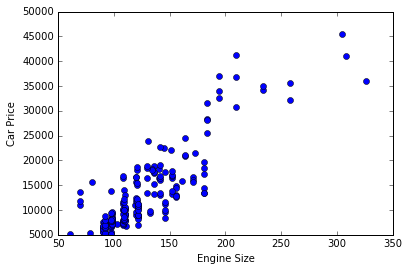

In [22]:
plt.plot(X_engine_size, y_car_price, 'o')
plt.xlabel('Engine Size')
plt.ylabel('Car Price')

### 1.3 Sigmoid

In [79]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [101]:
X_sig = np.arange(-10, 10, 0.05)
y_sig = sigmoid(X_sig)

In [102]:
X_sig.shape

(400,)

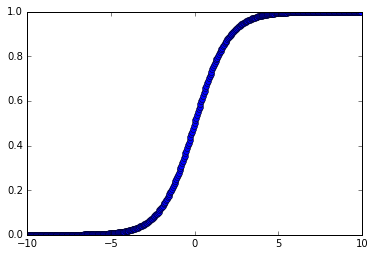

In [103]:
plt.plot(X_sig, y_sig, 'o')

## 2. Model Setup: y = a0 + a1 * x

In [104]:
a0 = pymc.Normal('a0', 0, 0.001)
a1 = pymc.Normal('a1', 0, 0.001)

In [105]:
X = pymc.Normal('nox', 0, 1, value = X_sig, observed = True)

In [106]:
@pymc.deterministic
def linear_model(a0 = a0, a1 = a1, x = X_sig):
    return a0 + a1 * x

In [107]:
y = pymc.Normal('price', linear_model, 1, value = y_sig, observed = True)

In [108]:
model = pymc.Model([linear_model, a0, a1, y_sig, X_sig])

## 3. Learning: MCMC

In [109]:
mcmc = pymc.MCMC(model)

In [110]:
mcmc.sample(50000, 20000)

 [-----------------100%-----------------] 50000 of 50000 complete in 6.1 sec

(array([    5.,     4.,    19.,    40.,    81.,   191.,   275.,   471.,
          739.,  1033.,  1558.,  2179.,  2500.,  2793.,  3218.,  3064.,
         2838.,  2451.,  2095.,  1712.,  1122.,   698.,   440.,   215.,
          125.,    68.,    26.,    25.,     6.,     9.]),
 array([ 0.03851788,  0.04077547,  0.04303306,  0.04529064,  0.04754823,
         0.04980582,  0.05206341,  0.054321  ,  0.05657859,  0.05883618,
         0.06109377,  0.06335136,  0.06560895,  0.06786654,  0.07012413,
         0.07238172,  0.0746393 ,  0.07689689,  0.07915448,  0.08141207,
         0.08366966,  0.08592725,  0.08818484,  0.09044243,  0.09270002,
         0.09495761,  0.0972152 ,  0.09947279,  0.10173037,  0.10398796,
         0.10624555]),
 <a list of 30 Patch objects>)

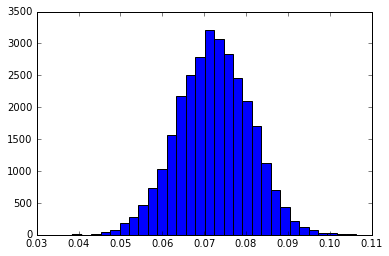

In [111]:
# Posterior of 'a1'

plt.hist(mcmc.trace('a1')[:], bins=30)

(array([    8.,     8.,    31.,    16.,    45.,   118.,   180.,   250.,
          576.,   888.,  1219.,  1670.,  2268.,  2680.,  3243.,  3079.,
         2803.,  2594.,  2530.,  1769.,  1484.,   945.,   709.,   382.,
          226.,   150.,    77.,    31.,    15.,     6.]),
 array([ 0.29818516,  0.31108173,  0.32397831,  0.33687488,  0.34977145,
         0.36266802,  0.3755646 ,  0.38846117,  0.40135774,  0.41425432,
         0.42715089,  0.44004746,  0.45294404,  0.46584061,  0.47873718,
         0.49163376,  0.50453033,  0.5174269 ,  0.53032348,  0.54322005,
         0.55611662,  0.56901319,  0.58190977,  0.59480634,  0.60770291,
         0.62059949,  0.63349606,  0.64639263,  0.65928921,  0.67218578,
         0.68508235]),
 <a list of 30 Patch objects>)

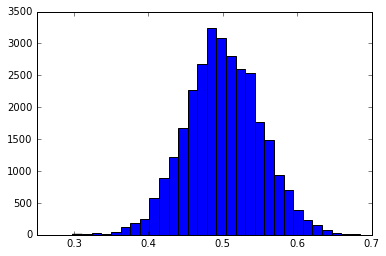

In [112]:
# Posterior of 'a0'

plt.hist(mcmc.trace('a0')[:], bins=30)

('Mean a0: ', 0.50021713230355414)
('Std. Dev. a0: ', 0.05004758893487718)


('Mean a1: ', 0.072312374439741992)
('Std. Dev. a1: ', 0.0086479996278778365)
('Mode a0: ', 0.47999999999999998)
('Mode a1: ', 0.070000000000000007)


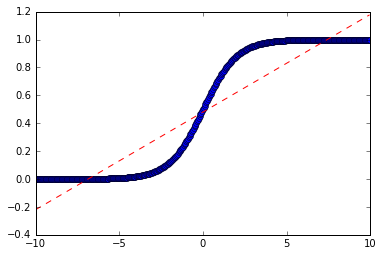

In [113]:
mean_a0 = np.mean(mcmc.trace('a0')[:])
mean_a1 = np.mean(mcmc.trace('a1')[:])

print ('Mean a0: ', mean_a0)
print ('Std. Dev. a0: ', np.var(mcmc.trace('a0')[:])**0.5)

print '\n'
print ('Mean a1: ', mean_a1)
print ('Std. Dev. a1: ', np.var(mcmc.trace('a1')[:])**0.5)

sd_a0 = np.var(mcmc.trace('a1')[:])**0.5
sd_a1 = np.var(mcmc.trace('a1')[:])**0.5

a0_samples = [round(s, 2) for s in mcmc.trace('a0')[:]]
a1_samples = [round(s, 2) for s in mcmc.trace('a1')[:]]

from scipy import stats
mode_a0 = stats.mode(a0_samples)[0][0]
mode_a1 = stats.mode(a1_samples)[0][0]

print ('Mode a0: ', mode_a0)
print ('Mode a1: ', mode_a1)

plt.plot(X_sig, y_sig, 'o', X_sig, mode_a0 + X_sig * mode_a1, 'r--')

In [116]:
X_test = np.arange(np.min(X_sig), np.max(X_sig), 1)
y_pred = mode_a0 + X_test * mode_a1

print (y_pred.shape)

(20,)


In [119]:
variance_y = 1 / ((1 / sd_a1) + (1 / np.var(X_sig)**0.5))
print variance_y

0.00863506531763


<Container object of 3 artists>

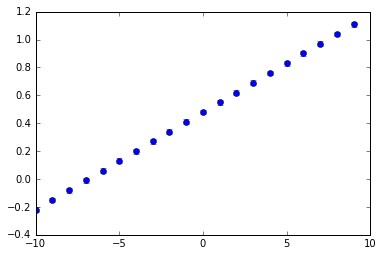

In [121]:
ci_95 = [(y_i - 2 * variance_y, y_i + 2 * variance_y) for y_i in y_pred]

plt.errorbar(x = X_test, y = y_pred, yerr=[(top - bottom) / 2 for (top, bottom) in ci_95], fmt='o')